## Liar Liar dataset 

We have choosed the Liar Liar dataset for the Alternus Vera project. As a part of my analysis i have worked on 2 features mainly and also worked on LDA with other Team member
-  Sentiment Analysis
-  Latent Dirichlet Allocation
-  Latent Semantic Analysis

In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.tsv', sep="\t", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context'],skipinitialspace=True)
#df.drop(['Lbl_Foreign_Worker'])
# Print Top 10 rows
df.head(10)

,ID,Label,Statement,Subject,Speaker,Speakers Job Title,State Info,Party Affiliation,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts,The Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


### A brief description of the given dataset 

In [76]:
df.describe()

,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407
std,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


### Group by the subject to check if we could apply some techniques such as one hot encoding etc 

In [78]:
df.groupby("Speakers Job Title").describe()

half true counts  \
                                                               count   
Speakers Job Title                                                     
4th Congressional District's congressman                         2.0   
501 (c) (4) educational group                                    1.0   
8th District congressional candidate                             5.0   
9-12 member in Tampa                                             1.0   
A liberal-oriented advocacy organization                         2.0   
A ride-sharing service                                           1.0   
ABC News                                                         1.0   
ABC News chief White House correspondent                         1.0   
ABC News' Chief Health and Medical Editor.                       1.0   
Activist group                                                   2.0   
Actor                                                           18.0   
Actor and director                                               1.0   
Actor, director, activist                                        1.0   
Advertising executive                                            3.0   
Adviser                                                          1.0   
Advocacy                                                         1.0   
Advocacy group                                                  12.0   
Advocacy group for U.S. policy toward Israel                     2.0   
Affiliated professor of public policy at George...               3.0   
Airport owner                                                    1.0   
Alaska Department of Public Resources commissioner               5.0   
Allegheny County District Attorney                               1.0   
Altria spokesman                                                 1.0   
American University adjunct professor                            1.0   
American businessman                                             1.0   
An anchor for CNN                                                2.0   
Anti-death-penalty activist                                      1.0   
Archbishop                                                       1.0   
Arizona State Treasurer                                          1.0   
Artist                                                           1.0   
...                                                              ...   
staff writer at the New Yorker, legal analyst f...               1.0   
state House speaker                                              2.0   
state Senator                                                    2.0   
state Superintendent                                             1.0   
state agriculture commissioner                                   9.0   
state assemblyman                                                1.0   
state director of administration in Rhode Island                 1.0   
state land commissioner                                          8.0   
state legislator                                                 1.0   
state program                                                    1.0   
state representative                                            44.0   
state representative                                             1.0   
state senator                                                   42.0   
substance abuse coordinator in Warren, R.I.                      1.0   
super PAC                                                        8.0   
superintendent of Pasco County's public schools                  1.0   
talk show host                                                   1.0   
talk show host, WHJJ                                             3.0   
teacher, blogger                                                 1.0   
television and radio host                                        1.0   
transportation consultant                                        1.0   
transportation director, city of Roswell                         1.0   
venture capital comp

### From the above visualization, we could see that there are 3827 rows, for this we cannot apply one hot encoding due to the high number unique words 

In [14]:
df.groupby('Speaker').describe()

half true counts            \
                                                          count mean  std   
Speaker                                                                     
18-percent-american-public                                  2.0  0.0  0.0   
60-plus-association                                         2.0  0.0  0.0   
AARP                                                        1.0  0.0  NaN   
Arizona-Citizens-Defense-League                             2.0  1.0  0.0   
Ballesteros                                                 1.0  0.0  NaN   
Coast-Guard                                                 1.0  0.0  NaN   
GaGOP                                                       4.0  1.0  0.0   
Kiplinger-com                                               1.0  1.0  NaN   
Yes-on-79                                                   1.0  1.0  NaN   
abel-collins                                                1.0  0.0  NaN   
accountability-government                                   1.0  0.0  NaN   
accountability-project                                      1.0  1.0  NaN   
aclu-florida                                                3.0  1.0  0.0   
aclu-georgia-foundation                                     1.0  0.0  NaN   
aclu-north-carolina                                         1.0  0.0  NaN   
actionaid-k                                                 2.0  1.0  0.0   
adam-hasner                                                 9.0  4.0  0.0   
adam-kinzinger                                              3.0  1.0  0.0   
adam-putnam                                                 7.0  1.0  0.0   
adam-schefter                                               1.0  0.0  NaN   
addicting-information                                       1.0  0.0  NaN   
advancing-wisconsin                                         1.0  0.0  NaN   
afl-cio                                                     3.0  2.0  0.0   
afscme                                                      7.0  2.0  0.0   
afscme-people                                               1.0  0.0  NaN   
agenda-project                                              2.0  0.0  0.0   
akbar-al-baker                                              1.0  0.0  NaN   
al-cardenas                                                 1.0  0.0  NaN   
al-gore                                                     4.0  3.0  0.0   
al-hunt                                                     2.0  0.0  0.0   
...                                                         ...  ...  ...   
wisconsin-family-action                                     1.0  0.0  NaN   
wisconsin-humane-society                                    1.0  0.0  NaN   
wisconsin-institute-law-liberty                             1.0  0.0  NaN   
wisconsin-jobs-now                                          1.0  0.0  NaN   
wisconsin-manufacturers-and-commerce                        6.0  2.0  0.0   
wisconsin-medical-society                                   1.0  0.0  NaN   
wisconsin-professional-police-association                   2.0  0.0  0.0   
wisconsin-sierra-club                                       1.0  0.0  NaN   
wisconsin-state-afl-cio                                     2.0  0.0  0.0   
wisconsin-transportation-builders-association               1.0  0.0  NaN   
women-wall                                                  1.0  0.0  NaN   
woody-degan                                                 1.0  0.0  NaN   
workers-voice                                               4.0  0.0  0.0   
worldnetdaily                                               2.0  0.0  0.0   
wrongwayrubiocom                                            1.0  0.0  NaN   
xavier-becerra                                              2.0  0.0  0.0   
xi-jinping                                                  1.0  0.0  NaN   
yard-sign                                                   1.0  0.0  NaN   
yes-62-death-penalty-repeal                

In [16]:
df['length'] = df['Statement'].apply(len)
df.head()

,ID,Label,Statement,Subject,Speaker,Speakers Job Title,State Info,Party Affiliation,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts,The Context,length
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

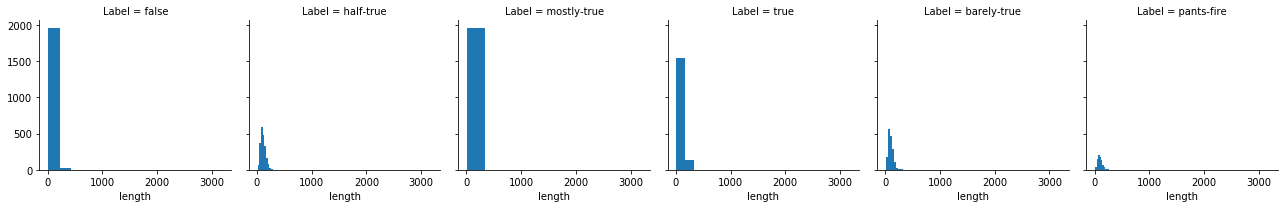

In [18]:
g = sns.FacetGrid(df,col='Label')
g.map(plt.hist,'length')

From the above figure we can that that the data set contains more Statements in the category ‘false’ and ‘mostly true’, and it consists of lease number of messages in the category ‘pants-fire’. Now based on the above visualization we don’t get a clear picture on how to classify or predict the category of the statement based on the length as we could see most of messages have the length between 0-500, hence category of a statement cannot be classified based on length. 

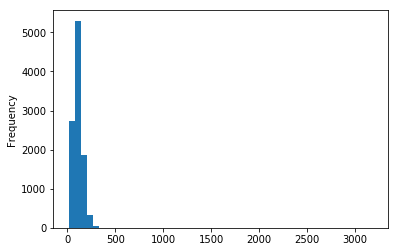

In [19]:
df['length'].plot(bins=50, kind='hist') 

In [20]:
df.length.describe()

count    10240.000000
mean       106.918750
std         59.917722
min         11.000000
25%         73.000000
50%         99.000000
75%        132.250000
max       3192.000000
Name: length, dtype: float64

### Removing the stopwords, punctuations  

In [21]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Now for all the statements the punctuations and stopwords can be removed using the above function 

In [22]:
df['Statement'] = df['Statement'].apply(text_process)

In [23]:
df = df.drop(columns=['Speakers Job Title','State Info'])

In [24]:
df.head()

,ID,Label,Statement,Subject,Speaker,Party Affiliation,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts,The Context,length
0,2635.json,false,"[Says, Annies, List, political, group, support...",abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82
1,10540.json,half-true,"[decline, coal, start, started, natural, gas, ...","energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
2,324.json,mostly-true,"[Hillary, Clinton, agrees, John, McCain, votin...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
3,1123.json,false,"[Health, care, reform, legislation, likely, ma...",health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,78
4,9028.json,half-true,"[economic, turnaround, started, end, term]","economy,jobs",charlie-crist,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54


In [5]:
df = df.replace( np.nan,'NA', regex=True)

### Now the data set does not have any null values 

In [53]:
df.isnull().values.any()

False

### Data preprocessing

There are a number of empty records so we have do the data cleaning in order to make some progress and apply the nlp techniques

The Reserach paper postedn on canvas gives a good information about the problem in identifying fake news, in todays world most of the people rely on online media for news. So it is utmost import to identify the news spread over social media as it is easy and involves no cost to publish a news unlike regular news channel which published news only if the content is credible.
The paper focuses on these aspects.

•	It defines what fake news is, how to characterize the news by comparing it with different theories

•	It explains about different methods involved in detection of fake news, it gives a brief explaining of different methods along with some mathematical proof involved in these techniques for a better understanding.

•	It also provides some datasets and existing techniques used to detect fake news.
The two main aspects of fake news are Characterization and detection

The top features which we found out from the papers are as follows

•	Political Affiliation 

•	Eco Chamber effect

•	Topic features using LDA

•	Sensationalism

•	Author Credibility

•	Spam score

•	Visual, Images and links

•	Occurrence location

•	Credibility 

•	Source

 

### Next Steps

I would be working on Sentimental Analysis, Topic Modelling Latent Dirichlet Allocation (LDA) and other Distillation techniques on the given dataset

#### As a part of experimenting I have done some analyis to detect if a given message is spam or not. Please find the notebook attached.

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\tarun\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
import tokenizer
import tokenize

for i in a:
    
    # clean and tokenize document string
    raw = i
    tokens = tokenizer.tokenize(raw)

    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [54]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.tsv', sep="\t", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context'],skipinitialspace=True)
#df.drop(['Lbl_Foreign_Worker'])
# Print Top 10 rows
df = df.replace( np.nan,'NA', regex=True)
df.head(10)

,ID,Label,Statement,Subject,Speaker,Speakers Job Title,State Info,Party Affiliation,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts,The Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NA,NA,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NA,Florida,democrat,15,9,20,19,2,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NA,Texas,republican,3,1,1,3,1,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NA,NA,organization,0,0,1,0,1,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0,0,0,1,0,an online video


In [68]:
data_text = df[['Statement']]


In [56]:
data_text['index'] = data_text.index
documents = data_text

C:\Users\tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
print(len(documents))
print(documents[:5])

10240
                                           Statement  index
0  Says the Annies List political group supports ...      0
1  When did the decline of coal start? It started...      1
2  Hillary Clinton agrees with John McCain "by vo...      2
3  Health care reform legislation is likely to ma...      3
4  The economic turnaround started at the end of ...      4


### Tokenization
- It is the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens.
- We will be tokenizing our liar liar dataset

In [58]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### There are two types in which stemming can be performed 
-  stemmer = SnowballStemmer('english')
-  stemmer = PorterStemmer()


In [59]:
def lemmatize_stemming(text):
    #stemmer = SnowballStemmer('english')
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

#### stemmer = PorterStemmer()

In [60]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Members', 'of', 'the', 'public', 'are', 'being', 'charged', '$50', 'to', 'hear', 'Gov.', 'Scott', 'Walker', 'and', 'a', 'dozen', 'members', 'of', 'his', 'administration', 'talk', 'about', 'jobs', 'and', 'the', 'economy', 'at', 'Lambeau', 'Field.']


 tokenized and lemmatized document: 
['member', 'public', 'charg', 'hear', 'scott', 'walker', 'dozen', 'member', 'administr', 'talk', 'job', 'economi', 'lambeau', 'field']


In [61]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    #stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

### stemmer = SnowballStemmer('english') 

In [62]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Members', 'of', 'the', 'public', 'are', 'being', 'charged', '$50', 'to', 'hear', 'Gov.', 'Scott', 'Walker', 'and', 'a', 'dozen', 'members', 'of', 'his', 'administration', 'talk', 'about', 'jobs', 'and', 'the', 'economy', 'at', 'Lambeau', 'Field.']


 tokenized and lemmatized document: 
['member', 'public', 'charg', 'hear', 'scott', 'walker', 'dozen', 'member', 'administr', 'talk', 'job', 'economi', 'lambeau', 'field']


### I have used both SnowballStemmer and  PorterStemmer but i see no difference between them

In [63]:
processed_docs = documents['Statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: Statement, dtype: object

### Craeted a dictionary with the top 10 topics 

In [48]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [49]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [50]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(7, 1),
 (85, 1),
 (127, 1),
 (128, 1),
 (182, 2),
 (254, 1),
 (277, 1),
 (323, 1),
 (542, 1),
 (792, 1),
 (1023, 1)]

In [51]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 7 ("administr") appears 1 time.
Word 85 ("economi") appears 1 time.
Word 127 ("scott") appears 1 time.
Word 128 ("walker") appears 1 time.
Word 182 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 277 ("public") appears 1 time.
Word 323 ("hear") appears 1 time.
Word 542 ("charg") appears 1 time.
Word 792 ("talk") appears 1 time.
Word 1023 ("field") appears 1 time.


# Sentiment Analysis 

Now we cleaned and pre-processed the data i.e 
- Stemming
- Lemmatization
- Tokennization
- Removed Stopwords

At this point now we can go ahead and apply sentiment analysis to our liar liar dataset.


### Analysis infered from Yelp data 

In order to perform better analysis on the liar liar dataset I have performend Data Enrichment using the yelp review dataset

In [94]:
dt["Statement"] = processed_docs

In [96]:
import numpy as np
import pandas as pd

In [97]:
yelp = pd.read_csv('yelp.csv')
yelp = yelp.reset_index()

In [98]:
X1 = yelp['text']

In [99]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
index          10000 non-null int64
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [100]:
yelp.describe()

,index,stars,cool,useful,funny
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,3.777500,0.876800,1.409300,0.701300
std,2886.89568,1.214636,2.067861,2.336647,1.907942
min,0.00000,1.000000,0.000000,0.000000,0.000000
25%,2499.75000,3.000000,0.000000,0.000000,0.000000
50%,4999.50000,4.000000,0.000000,1.000000,0.000000
75%,7499.25000,5.000000,1.000000,2.000000,1.000000
max,9999.00000,5.000000,77.000000,76.000000,57.000000


In [101]:
yelp['text length'] = yelp['text'].apply(len)

In [102]:
yelp.head()

,index,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

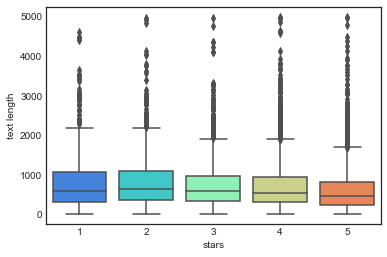

In [104]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

The yelp dataset consisted of a wide range of features, the features that are selected from the dataset are rating and a new column is added which is length of review i.e. text length as given by the user. The below is the visualization of different ratings as given by the user against the length of the review. 

In [105]:
stars = yelp.groupby('stars').mean()
stars

,index,cool,useful,funny,text length
stars,,,,,
1,5019.459279,0.576769,1.604806,1.056075,826.515354
2,4975.333333,0.719525,1.563107,0.875944,842.256742
3,4964.651608,0.788501,1.306639,0.694730,758.498289
4,5035.318491,0.954623,1.395916,0.670448,712.923142
5,4979.143542,0.944261,1.381780,0.608631,624.999101


### I have considered only 1 start and 5 star ratings from the yelp data and discarded the reviews with ratings 2, 3 and 4. 

In [107]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [108]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [109]:
X = yelp_class['text']
y = yelp_class['stars']

### Shuffle the data for better results  

In [110]:
from sklearn.utils import shuffle
X, y = shuffle(X,y)

In [111]:
print(X[10])

The oldish man who owns the store is as sweet as can be.  Perhaps sweeter than the cookies or ice cream.

Here's the lowdown: Giant ice cream cookie sandwiches for super cheap.  The flavor permutations are basically endless.  I had snickerdoodle with cookies and cream ice cream.  It was marvelous.


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [113]:
X = cv.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [116]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [117]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [119]:
predictions = nb.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[146  74]
 [ 39 967]]


             precision    recall  f1-score   support

          1       0.79      0.66      0.72       220
          5       0.93      0.96      0.94      1006

avg / total       0.90      0.91      0.90      1226



I have just tested the model with the yelp data set i.e trained on yelp dataset and applied the train data on the model and got the above results. 

In [122]:
import pandas as pd
import numpy as np
dt= pd.read_csv('train.tsv', sep="\t", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context'],skipinitialspace=True)
#df.drop(['Lbl_Foreign_Worker'])
# Print Top 10 rows
dt.head(10)

,ID,Label,Statement,Subject,Speaker,Speakers Job Title,State Info,Party Affiliation,Total credit history count,false counts,half true counts,mostly true counts,pants on fire counts,The Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [123]:
import numpy as np

dt = dt.replace(['pants-fire', 'barely-true', 'false', 'half-true', 'mostly-true', 'true'],[1,1,1,5,5,5]) 
cols = ['ID','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context']
dt.drop(cols, axis=1, inplace=True)
X

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

### Nows lets consider the Liar Liar dataste and perform our sentimental analysis

In [151]:
df['Statement']
print(df['Statement'][0])

Says the Annies List political group supports third-trimester abortions on demand.


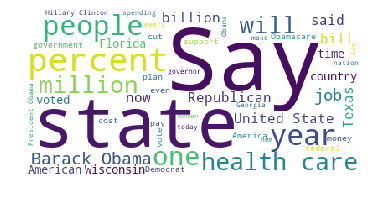

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS


# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in df['Statement']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)
        # update stopwords to include common words like film and mov

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

### From the above we can see how many time a word has been occured. The complete liar liar data is been loaded and the we can see the plot generated above 

In [156]:
from sklearn.utils import shuffle

def prepare_imdb_data(data_text):
    """Prepare training and test sets."""
    
    # TODO: Combine positive and negative reviews and labels
    data_train = dt['Statement']
    labels_train = ['pos' for i in range(len(df['Statement']))]
    
    data_test = dt['Statement']
    labels_test = ['pos' for i in range(len(df['Statement']))]
    
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train, random_state=0)
    data_test, labels_test = shuffle(data_test, labels_test, random_state=0)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data_text)
print("Total True and False news  (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

Total True and False news  (combined): train = 10240, test = 10240


In [157]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
def review_to_words(review):
    """Convert a raw string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    soup = BeautifulSoup(review, 'html5lib')
    text = soup.get_text()
    #       convert to lowercase, tokenize,
    text = re.sub(r"[^a-zA-Z0-9]", ' ', text.lower())
    words = text.split()
    #       remove stopwords and stem
    words = [w.strip() for w in words if w not in stopwords.words('english')]
    words = [stemmer.stem(w) for w in words]

    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

In [167]:
data= dt[['Statement','Label']]

In [168]:
data.head()

,Statement,Label
0,"[say, anni, list, polit, group, support, trime...",1
1,"[declin, coal, start, start, natur, take, star...",5
2,"[hillari, clinton, agre, john, mccain, vote, g...",5
3,"[health, care, reform, legisl, like, mandat, f...",1
4,"[econom, turnaround, start, term]",5


In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [170]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)

True News


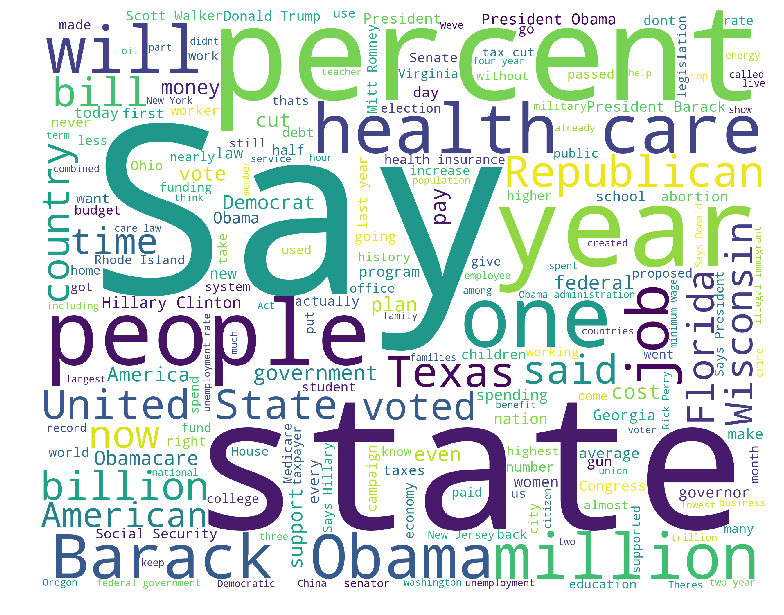

False News


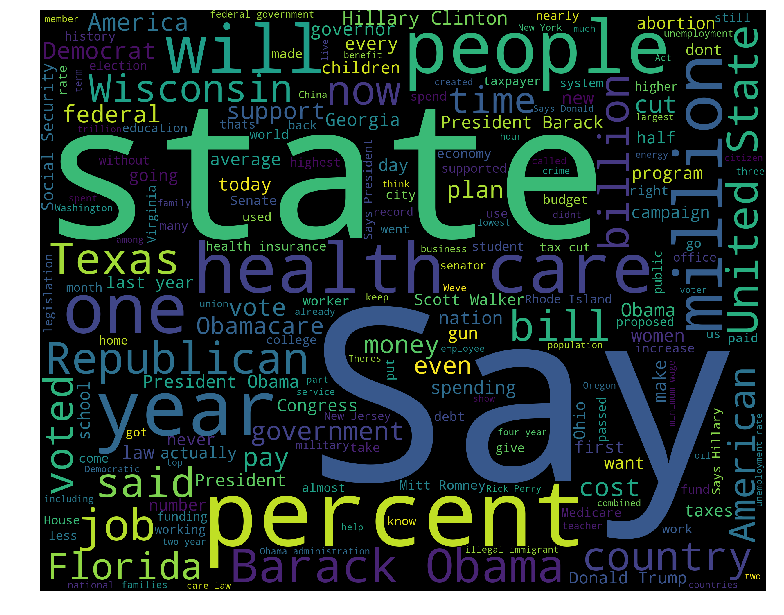

In [67]:
train_pos = train[ train['Label'] == 1]
train_pos = train_pos['Statement']
train_neg = train[ train['Label'] == 0]
train_neg = train_neg['Statement']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in df['Statement']
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("True News")
wordcloud_draw(train_pos,'white')
print("False News")
wordcloud_draw(train_neg)

In [159]:
dt['Statement'] = processed_docs

In [126]:
import pandas
df = pandas.DataFrame(data={'Statement': dt['Statement'], 'Label': dt['Label']})
df.to_csv("file.csv", sep=',',index=False)

In [128]:
df.head()

,Label,Statement
0,1,"[say, anni, list, polit, group, support, trime..."
1,5,"[declin, coal, start, start, natur, take, star..."
2,5,"[hillari, clinton, agre, john, mccain, vote, g..."
3,1,"[health, care, reform, legisl, like, mandat, f..."
4,5,"[econom, turnaround, start, term]"


In [129]:
review = pd.read_csv('file2.csv').dropna(axis='rows')

### 1 - False News 
### 5 - True News

In [144]:
review["Statement"][12000]

"['dream', 'write', 'member', 'parti', 'come', 'vote', 'year', 'half', 'republican', 'congress', 'block', 'hadnt', 'chang', 'thing', 'chang', 'polit']"

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [134]:
X = review['Statement']
y = review['Label']

### I have merged the yelp data and liar liar data, trained the model using the yelp data set and tested it on the liar liar dataset

In [135]:
X = cv.fit_transform(X)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state=101)

In [138]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [139]:
review = review.replace( np.nan,'NA', regex=True)
review.isnull().values.any()

False

In [140]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [141]:
predictions = nb.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2203  418]
 [2692 1850]]


             precision    recall  f1-score   support

        1.0       0.45      0.84      0.59      2621
        5.0       0.82      0.41      0.54      4542

avg / total       0.68      0.57      0.56      7163



- From the yelp dataset I have chosen the best and poor reviews as given by the user and trained the model, from the liar liar dataset I have classified all the different categories into either true of false thereby having only two labels. I have trained the model on the yelp data and tested it on the liar liar dataset. The model was able to good predictions, the confusion matrix and the classification report are as follows. 

### Latent Dirichellt Allocation 

-  LDA is an example of topic model and is extensively used to classify to classify a text based on topics identified from the model. 
- It builds a topic from the document and words per topic model. So initially we have to train the model using the available documents, the model then creates top topics and we can use these topics to classify any new document or text data

In [52]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]


In [53]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [54]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.058*"say" + 0.025*"state" + 0.018*"vote" + 0.016*"texa" + 0.015*"american" + 0.011*"percent" + 0.011*"billion" + 0.011*"year" + 0.010*"million" + 0.009*"clinton"
Topic: 1 
Words: 0.039*"say" + 0.015*"vote" + 0.015*"american" + 0.014*"care" + 0.012*"state" + 0.011*"obamacar" + 0.011*"trump" + 0.010*"kill" + 0.010*"year" + 0.009*"republican"
Topic: 2 
Words: 0.056*"obama" + 0.043*"presid" + 0.042*"say" + 0.034*"barack" + 0.019*"year" + 0.015*"illeg" + 0.014*"time" + 0.013*"rate" + 0.012*"immigr" + 0.010*"support"
Topic: 3 
Words: 0.043*"say" + 0.034*"state" + 0.034*"health" + 0.028*"care" + 0.014*"plan" + 0.013*"want" + 0.012*"job" + 0.012*"romney" + 0.010*"year" + 0.010*"scott"
Topic: 4 
Words: 0.051*"percent" + 0.027*"say" + 0.027*"year" + 0.018*"state" + 0.012*"plan" + 0.010*"employe" + 0.009*"public" + 0.008*"averag" + 0.008*"privat" + 0.007*"secur"
Topic: 5 
Words: 0.041*"say" + 0.023*"school" + 0.022*"vote" + 0.017*"year" + 0.016*"democrat" + 0.014*"spend" + 0.01

In [55]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"say" + 0.010*"romney" + 0.010*"mitt" + 0.010*"state" + 0.009*"dollar" + 0.008*"money" + 0.008*"spend" + 0.008*"year" + 0.008*"trillion" + 0.007*"abort"
Topic: 1 Word: 0.016*"say" + 0.013*"year" + 0.011*"percent" + 0.009*"obama" + 0.009*"state" + 0.009*"presid" + 0.008*"economi" + 0.007*"nation" + 0.007*"rate" + 0.007*"spend"
Topic: 2 Word: 0.013*"job" + 0.012*"say" + 0.011*"vote" + 0.009*"percent" + 0.008*"creat" + 0.008*"year" + 0.007*"state" + 0.007*"govern" + 0.006*"offic" + 0.006*"american"
Topic: 3 Word: 0.012*"state" + 0.011*"say" + 0.010*"billion" + 0.010*"spend" + 0.010*"fund" + 0.010*"million" + 0.010*"illeg" + 0.010*"percent" + 0.009*"immigr" + 0.008*"health"
Topic: 4 Word: 0.013*"say" + 0.009*"year" + 0.008*"state" + 0.008*"school" + 0.008*"public" + 0.008*"percent" + 0.007*"obama" + 0.007*"island" + 0.007*"million" + 0.006*"rhode"
Topic: 5 Word: 0.018*"obama" + 0.015*"presid" + 0.013*"say" + 0.011*"billion" + 0.011*"barack" + 0.010*"year" + 0.010*"stat

In [56]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5429511666297913	 
Topic: 0.056*"obama" + 0.043*"presid" + 0.042*"say" + 0.034*"barack" + 0.019*"year" + 0.015*"illeg" + 0.014*"time" + 0.013*"rate" + 0.012*"immigr" + 0.010*"support"

Score: 0.35701969265937805	 
Topic: 0.041*"say" + 0.023*"school" + 0.022*"vote" + 0.017*"year" + 0.016*"democrat" + 0.014*"spend" + 0.011*"peopl" + 0.011*"obama" + 0.011*"million" + 0.010*"public"

Score: 0.0125051224604249	 
Topic: 0.037*"state" + 0.033*"say" + 0.017*"unit" + 0.016*"percent" + 0.014*"govern" + 0.013*"vote" + 0.011*"cost" + 0.011*"feder" + 0.010*"colleg" + 0.010*"obama"

Score: 0.012504732236266136	 
Topic: 0.043*"say" + 0.034*"state" + 0.034*"health" + 0.028*"care" + 0.014*"plan" + 0.013*"want" + 0.012*"job" + 0.012*"romney" + 0.010*"year" + 0.010*"scott"

Score: 0.012504725717008114	 
Topic: 0.033*"say" + 0.020*"state" + 0.020*"million" + 0.014*"job" + 0.014*"year" + 0.013*"creat" + 0.010*"peopl" + 0.009*"half" + 0.009*"wisconsin" + 0.008*"citi"

Score: 0.01250459160655737	 


In [57]:
unseen_document = 'Top Republicans slam Trump for statement backing Saudi Arabia'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6415756344795227	 Topic: 0.033*"say" + 0.020*"state" + 0.020*"million" + 0.014*"job" + 0.014*"year"
Score: 0.22507049143314362	 Topic: 0.037*"state" + 0.033*"say" + 0.017*"unit" + 0.016*"percent" + 0.014*"govern"
Score: 0.01667134463787079	 Topic: 0.056*"obama" + 0.043*"presid" + 0.042*"say" + 0.034*"barack" + 0.019*"year"
Score: 0.016671035438776016	 Topic: 0.039*"say" + 0.015*"vote" + 0.015*"american" + 0.014*"care" + 0.012*"state"
Score: 0.016670193523168564	 Topic: 0.026*"say" + 0.023*"peopl" + 0.020*"percent" + 0.018*"american" + 0.016*"dont"
Score: 0.01666972041130066	 Topic: 0.043*"say" + 0.034*"state" + 0.034*"health" + 0.028*"care" + 0.014*"plan"
Score: 0.01666865311563015	 Topic: 0.035*"year" + 0.032*"tax" + 0.028*"percent" + 0.022*"say" + 0.022*"rais"
Score: 0.01666800118982792	 Topic: 0.041*"say" + 0.023*"school" + 0.022*"vote" + 0.017*"year" + 0.016*"democrat"
Score: 0.01666761375963688	 Topic: 0.051*"percent" + 0.027*"say" + 0.027*"year" + 0.018*"state" + 0.012*"

### I have additionally taken the feature State Info from the Liar Liar datset vectorized the data and then applied Random Forests on the data to make predictions

- Since all the data was textual we had to first vectorize the data as Random Forests cannot be applied on text data, it requires numberical data

In [69]:
df= pd.read_csv('train.tsv', sep="\t", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context'],skipinitialspace=True, usecols=[2,6])

In [ ]:
df = df.replace( np.nan,'NA', regex=True)

In [71]:
df.head()
df.isnull().values.any()

False

In [70]:
df = df.dropna(axis='rows')

In [72]:
data_slice_vectorizer = df[['Statement','State Info']]
data_slice_vectorizer.groupby('State Info').describe()

Statement         \
                                                      count unique   
State Info                                                           
Alabama                                                  14     14   
Alaska                                                   65     65   
Arizona                                                 182    181   
Arkansas                                                 84     84   
Atlanta                                                   1      1   
California                                              159    159   
California                                                4      4   
China                                                     1      1   
Colorado                                                 22     22   
Colorado                                                  3      3   
Connecticut                                              22     22   
Delaware                                                 68     68   
District of Columbia                                     12     12   
Florida                                                 997    997   
Florida                                                   6      6   
Georgia                                                 426    426   
Georgia                                                   7      7   
Hawaii                                                    1      1   
Idaho                                                     3      3   
Illinois                                                556    556   
Illinois                                                  2      2   
Indiana                                                  38     38   
Iowa                                                     19     19   
Kansas                                                   16     16   
Kentucky                                                 74     74   
Louisiana                                                29     29   
Maine                                                     2      2   
Maryland                                                 69     69   
Massachusetts                                           206    206   
Massachusetts                                             6      6   
...                                                     ...    ...   
Rhode Island                                              1      1   
Rhode island                                              1      1   
Russia                                                    1      1   
South Carolina                                           29     29   
South Dakota                                              3      3   
Tennesse                                                  1      1   
Tennessee                                                75     75   
Tex                                                       1      1   
Texas                                                  1009   1008   
United Kingdom                                            1      1   
Unknown                                                   2      2   
Utah                                                     19     19   
Vermont                                                  98     98   
Virgiia                                                   1      1   
Virgina                                                   3      3   
Virginia                                                407    407   
Virginia                                                  1      1   
Virginia director, Coalition to Stop Gun Violence         1      1   
Washington                                                7      7   
Washington D.C.                                           2      2   
Washington DC                                             1      1   
Washington state                                          6      6   
Washington, D.C.                                        120    120   
Washington, D.C.                                         12 

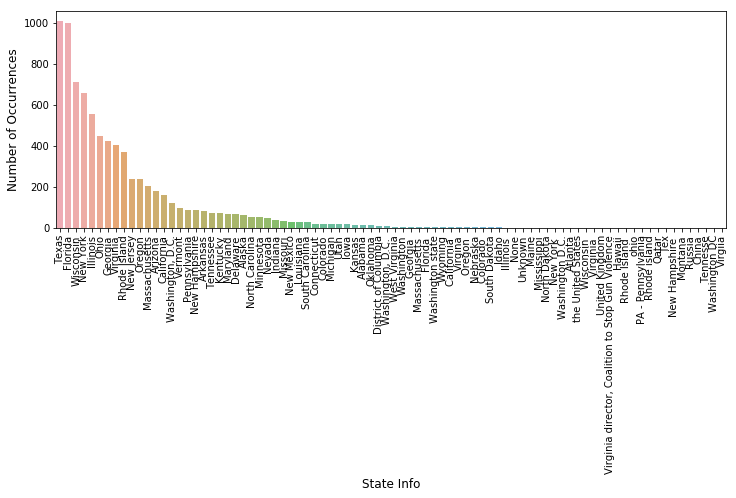

In [73]:
count_affiliation = data_slice_vectorizer['State Info'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_affiliation.index, count_affiliation.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State Info', fontsize=12)
plt.xticks(rotation=90)
plt.show();

#### I have visualized the state name on x-axis against the number of occurrences on the y-axis. I was able to successfully visualize the results, from the visualization we can see that there has been a lot of news from Texas followed by Florida. In this graph we could clearly visualize the number of occurrences of the news in a particular state.  

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_slice_vectorizer['Statement'], data_slice_vectorizer['State Info'], random_state = 0)

In [47]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 Says the Annies List political group supports third-trimester abortions on demand.


X_train shape:  (6024,)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

2383

- At this point the all the data is vectoized and we can apply Random Forests classifire on the dataset 

In [49]:
X_train_vectorized = vect.transform(X_train)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\tarun\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
rclf = RandomForestClassifier()

In [74]:
print(X_train_vectorized)

  (0, 2360)	0.2526645025003572
  (0, 2293)	0.1754089608730435
  (0, 2138)	0.07539148184575707
  (0, 1756)	0.658519296646349
  (0, 1507)	0.2092528383934642
  (0, 1186)	0.25459279875720275
  (0, 1107)	0.09521708489716871
  (0, 899)	0.13429817791968965
  (0, 800)	0.39662042837510736
  (0, 534)	0.3662351304983204
  (0, 251)	0.1972773013096015
  (1, 2379)	0.23086462391150797
  (1, 2378)	0.3852860272611131
  (1, 2376)	0.3045998930158365
  (1, 2138)	0.1083689146953849
  (1, 2134)	0.1164755278707793
  (1, 1409)	0.12381088992126923
  (1, 1253)	0.47648611296405724
  (1, 1107)	0.20529982760934173
  (1, 1090)	0.31565729272640847
  (1, 457)	0.2158142572004525
  (1, 411)	0.49943292436901743
  (2, 2172)	0.11219376596949353
  (2, 2138)	0.24324548166084092
  (2, 1680)	0.3990160419506457
  :	:
  (6022, 568)	0.18789260055912543
  (6022, 527)	0.321242851976219
  (6022, 503)	0.2553186030727823
  (6022, 308)	0.1965038510315714
  (6022, 274)	0.25142541247512545
  (6022, 243)	0.4243282310851121
  (6022, 221)	

### The above is the vectorized version of the data 

In [52]:
from sklearn.ensemble import RandomForestClassifier
rclf.fit(X_train_vectorized,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1]:
predictions = rclf.predict(vect.transform(X_test))
print(accuracy_score(y_test,predictions))

0.64333212345644


# Latent Semantic Analysis

LSA
Latent Semantic Analysis (LSA) is a theory and method for extracting and representing the contextual-usage meaning of words by statistical computations applied to a large corpus of text.
LSA is an information retrieval technique which analyzes and identifies the pattern in unstructured collection of text and the relationship between them.
LSA is an unsupervised way of uncovering synonyms in a collection of documents.

### TF-IDF 

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.
Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

dt= pd.read_csv('train.tsv', sep="\t", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context'],skipinitialspace=True)
tfidf = TfidfVectorizer()
tfidf.fit(dt['Statement'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [70]:
X = tfidf.transform(dt['Statement'])

In [71]:
dt['Statement'][0]

'Says the Annies List political group supports third-trimester abortions on demand.'

Check TF-IDF for few words

In [72]:
print([X[1, tfidf.vocabulary_['political']]])

[0.0]


In [73]:
import numpy as np

dt = dt.replace(['pants-fire', 'barely-true', 'false', 'half-true', 'mostly-true', 'true'],[0,0,0,1,1,1]) 
cols = ['ID','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Total credit history count','false counts',' half true counts','mostly true counts','pants on fire counts','The Context']
dt.drop(cols, axis=1, inplace=True)
dt.head()

,Label,Statement
0,0,Says the Annies List political group supports ...
1,1,When did the decline of coal start? It started...
2,1,"Hillary Clinton agrees with John McCain ""by vo..."
3,0,Health care reform legislation is likely to ma...
4,1,The economic turnaround started at the end of ...


In [63]:
dt.groupby('Label').size()

Label
0    4488
1    5752
dtype: int64

### Train test split
 

In [64]:
X = dt.Statement
y = dt.Label

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [46]:
print("Train set has total {0} entries with {1:.2f}% false news, {2:.2f}% true news".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 7680 entries with 43.62% false news, 56.38% true news


In [47]:
print("Test set has total {0} entries with {1:.2f}% false news, {2:.2f}% true news".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 2560 entries with 44.45% false news, 55.55% true news


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

C:\Users\tarun\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [50]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [52]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 56.88%
Test result for 20000 features
accuracy score: 56.13%
Test result for 30000 features
accuracy score: 57.19%


In [53]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

             precision    recall  f1-score   support

   negative       0.54      0.59      0.56      1138
   positive       0.64      0.59      0.62      1422

avg / total       0.59      0.59      0.59      2560



### Chi2 Feature Selection

In [54]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(dt.Statement)
y = dt.Label
chi2score = chi2(X_tfidf, y)[0]

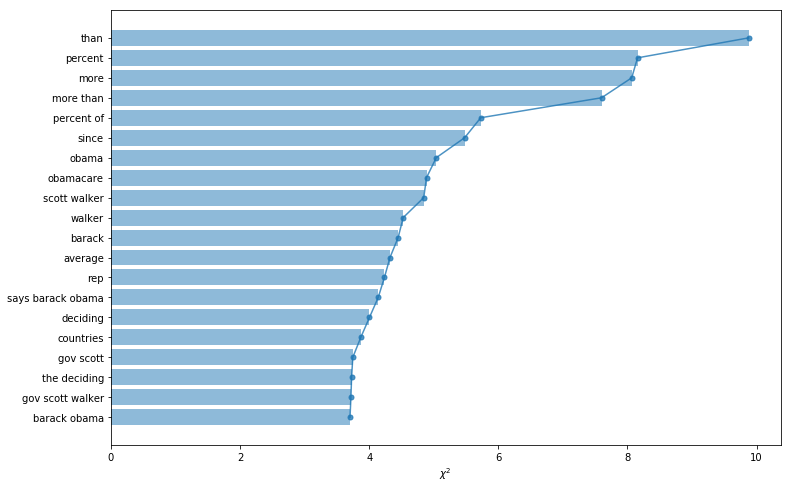

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

### Conclusion

- Finally I was able to perform analysis on the Liar Liar dataset
- I was able to do data enrichment
- I was successfully able to perform distillation on the dataset 
- I was able to apply Sentimental analysis
- I was able to apply analyis on features such as Statement, State Info
- I was aslo able to vectorize the data and apply LDA
- I have used Random Forests Classifier to develop the model
- Finally as a part of additional research i was able to apply Late Semantic Analysis.
- Latsly I was able to consolidate my findings in the form research paper that is contributed by my team.